# How to do analysis on individual spectral lines

## 0. Importing specpolFlow package

In [1]:
import specpolFlow as pol
import pandas as pd
import numpy as np

## 1 . Create individual line file

In this tutorial, we use the UPENA normalized spectrum `IndividualLine_tutorialfiles/1423137pn.s` of the active cool star BP Tau.

We first load in the spectrum. 

In [2]:
spec = pol.read_spectrum("IndividualLine_tutorialfiles/1423137pn.s")

To create the individual line file, we have to define the transition wavelength `lambda0` and the range with respect to the line center. In the example below, we select the HeI line at 667.815 nm in a 0.6 nm window.

In [3]:
# Create individual line profile 
lambda0 = 667.815;  geff = 1 # He i 667.815 nm
lwidth = 0.3 

prof = spec.individual_line(lambda0 =  lambda0, lwidth = lwidth)

The object `prof` inherits all the atributes from the LSD class. Therefore, you can use all the functionality discussed in the LSDClass Tutorial (i.e., one can normalize, slice, or shift the emission line profile).

Below, we visualize the individual line using the `plot` class function. 

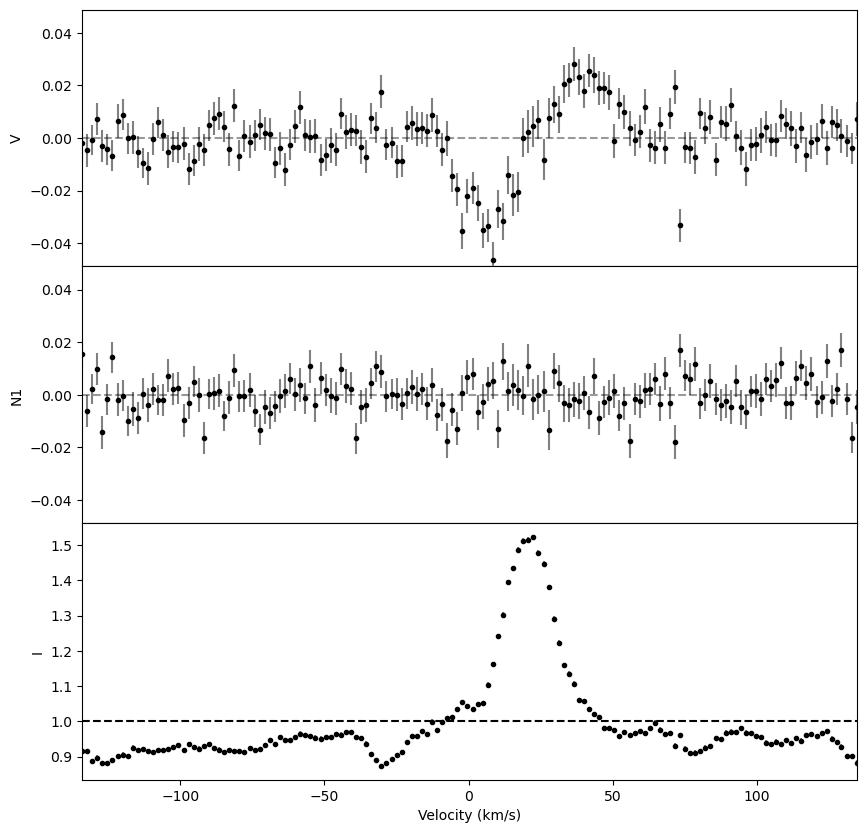

In [4]:
fig, axes = prof.plot()
axes[-1].axhline(1, color='k', ls = '--')

## 2. Calculate Bz

Below, we demonstrate how to compute the longitudinal field (Bz) of the individual line. 

using AUTO method for the normalization
  using the median of the continuum outside of the line


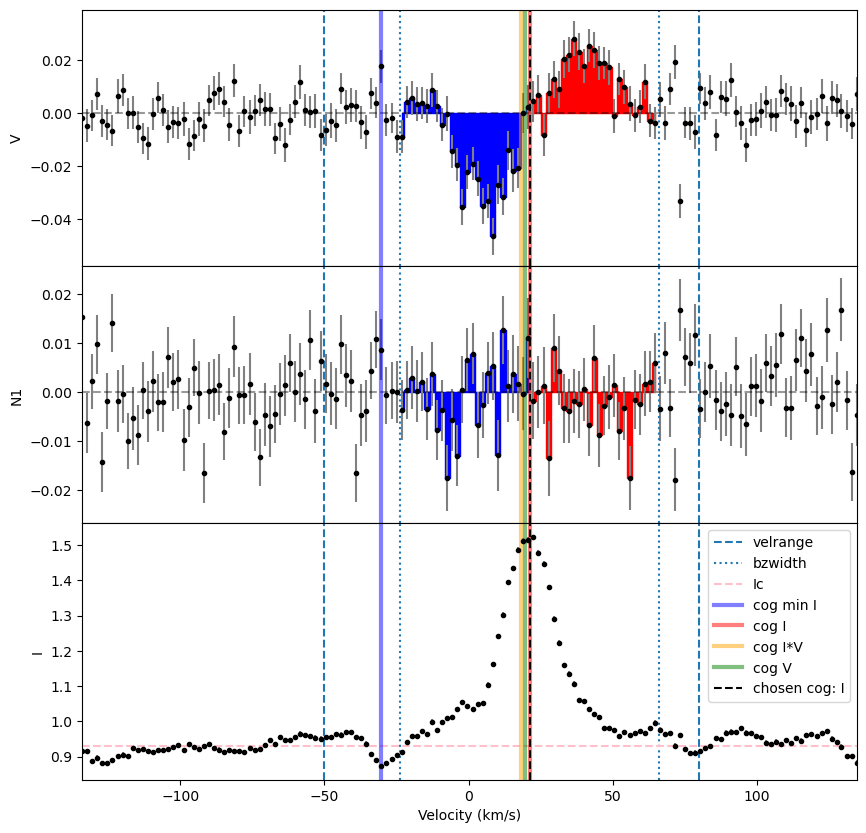

In [5]:
# Define the limits for the continuum normalization
cmin = -50; cmax = 80

# Compute Bz in a 45 km/s window
Bz, fig = prof.calc_bz(norm='auto', cog='I', 
                   velrange=[cmin, cmax], bzwidth=45, 
                   geff=geff, lambda0=lambda0,
                   plot=True, )    

We can then display the results using the pandas dataframa. For this particular line, we find Bz $= 1.2 \pm 0.1$kG.

In [6]:
Bz = pd.DataFrame(data=[Bz])

# Simple display of the pandas dataframe
Bz.style

,Ic,cog,Bzwidth min,Bzwidth max,V bz (G),V bz sig (G),V FAP,N1 bz (G),N1 bz sig (G),N1 FAP,N2 bz (G),N2 bz sig (G),N2 FAP
0,0.931285,21.173209,-23.826791,66.173209,1191.652271,138.729028,0.000000,-34.686996,138.584612,0.564259,0.000000,0.000000,0.000000


## 3. Normalize the individual line

In the figure above, we can promptly note that `calc_bz` improved the continuum normalization, taking the median of the continuum outside of the line. 
Therefore, we propagate this normalization in the `prof` object before saving the individual line profile into a file.

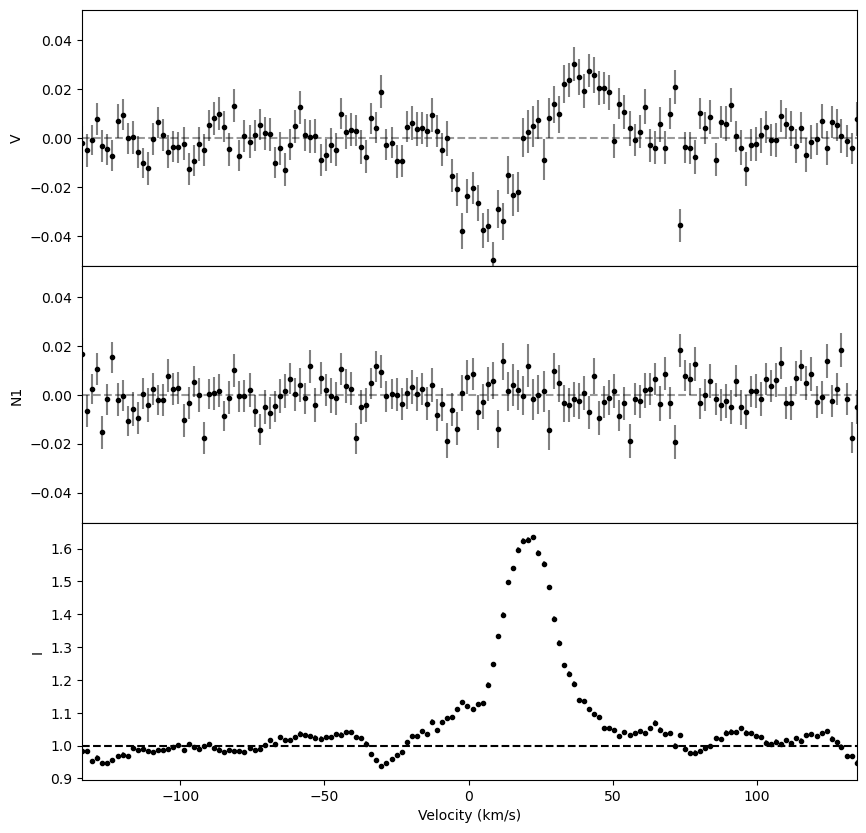

In [7]:
# Renormalize prof using the continuum value obtained by calc_bz
prof_norm = prof.norm(Bz['Ic'][0])

# Display the profile
fig, axes = prof_norm.plot()
axes[-1].axhline(1, color='k', ls = '--')

## 4. Saving individual lines

Finally, you can save the individual line into a file running the code below.

In [8]:
prof_norm.save("IndividualLine_tutorialfiles/1423137.Helium")